In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 9s 1us/step


In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape


(10000, 28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

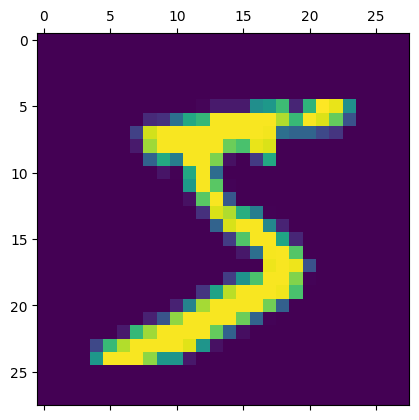

In [13]:
plt.matshow(x_train[0])


In [14]:

x_train = x_train / 255
x_test = x_test / 255


In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.6354 - accuracy: 0.8375 - val_loss: 0.3579 - val_accuracy: 0.9043
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - accuracy: 0.9058 - val_loss: 0.2962 - val_accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.9187 - val_loss: 0.2639 - val_accuracy: 0.9240
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9272 - val_loss: 0.2410 - val_accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2356 - accuracy: 0.9337 - val_loss: 0.2195 - val_accuracy: 0.9370
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9390 - val_loss: 0.2051 - val_accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9434 - val_loss: 0.1915 - val_accuracy

In [20]:

test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9522
Loss=0.162
Accuracy=0.952


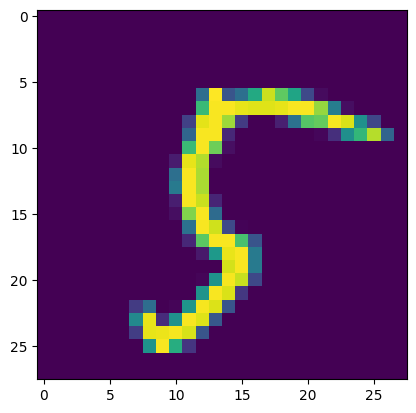

In [21]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [22]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 5


In [24]:
get_ipython().run_line_magic('pinfo2', 'history.history')

In [25]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

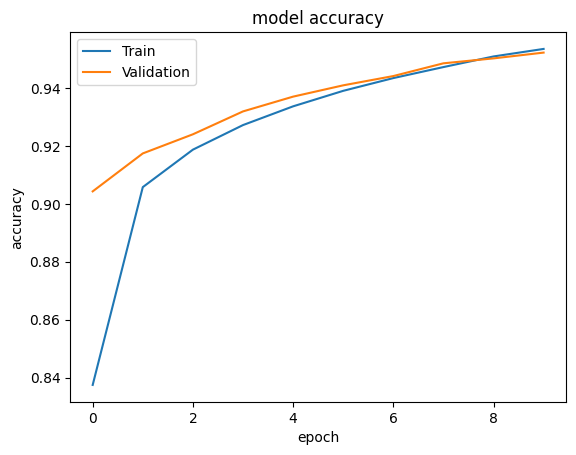

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

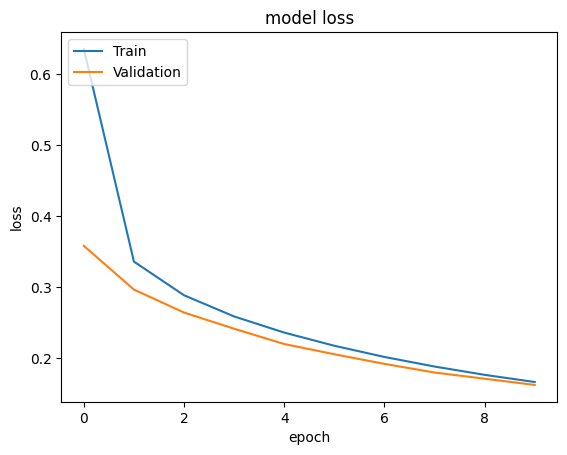

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



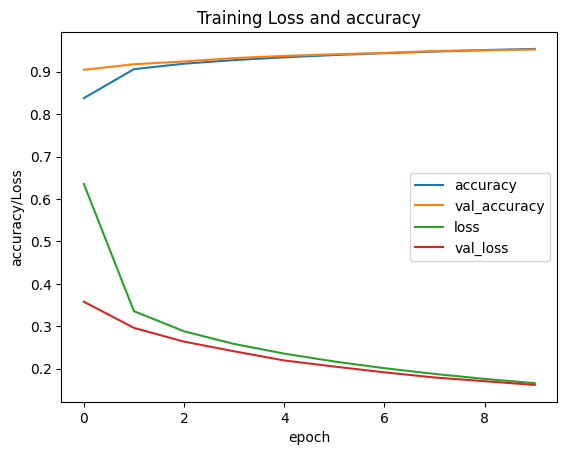

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [31]:
keras_model_path='C:\\Users\\Acer'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\Acer\assets


INFO:tensorflow:Assets written to: C:\Users\Acer\assets


In [32]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)